Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Aral Cimcim | K11720457 | 30.10.2023, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 2 &ndash; Reading, Handling and Visualization of Datasets</h2>

<b>Authors:</b> Brandstetter, Schäfl, Parada-Cabaleiro, Schörgenhumer<br>
<b>Date:</b> 16-10-2023

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u2_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u2_utils.py</code> need to be installed.

In [1]:
# Required packages and the u2_utils file
import u2_utils as u2
import IPython.display as ipd
import numpy as np
import spacy
from matplotlib.image import imread

u2.check_module_versions()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.24.3 (✓)
Installed pandas version: 2.0.1 (✓)
Installed scikit-learn version: 1.2.2 (✓)
Installed matplotlib version: 3.7.1 (✓)
Installed seaborn version: 0.12.2 (✓)
Installed scipy version: 1.10.1 (✓)
Installed spacy version: 3.7.2 (✓)


<h2>Exercise 1</h2>

Following the main lecture notebook, perform the tasks below:

<div class="alert alert-warning">
    <b>Exercise 1.1. [5 Points]</b>
    <ul>
        <li>Plot the image of a river named <code>river.jpg</code> (you will find this image in the folder <code>resources</code>).</li>
    </ul>
</div>

In [2]:
# path to image
image_path = "resources/river.jpg"

<div class="alert alert-warning">
    <b>Exercise 1.2. [8 Points]</b>
    <ul>
        <li>Load the image and print its dimensions.</li>
        <li>What do the numbers mean?</li>
    </ul>
</div>

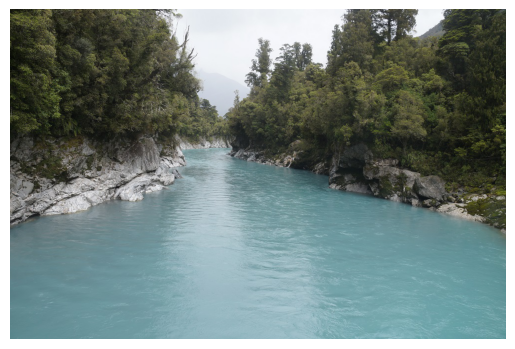

(665, 1000, 3)


In [3]:
# plot image
u2.plot_image(image_path)

# load image and print its dimensions
img = imread(image_path)
print(img.shape)

Height: 665 px, Width: 1000 px, Channels: 3

<h2>Exercise 2</h2>

By using the functions from `u2_utils.py` and working with the above image, perform the tasks below:

<div class="alert alert-warning">
    <b>Exercise 2.1. [3 Points]</b>
    <ul>
        <li>Plot the image by cropping it so that only the right-hand side of the river is visible (roughly starting at the center).</li>
    </ul>
</div>

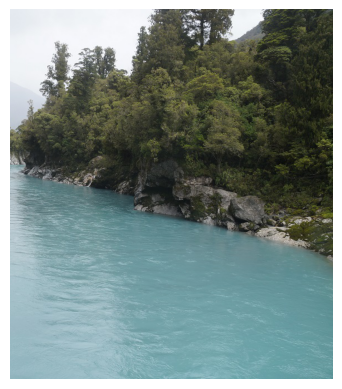

In [4]:
# crop the left side of the image
u2.plot_cropped_image(image_path, left=420, top=0, width=580, height=665)

<div class="alert alert-warning">
    <b>Exercise 2.2. [5 Points]</b>
    <ul>
        <li>Plot the image channels as well as the histograms for each color channel in the image.</li>
    </ul>
</div>

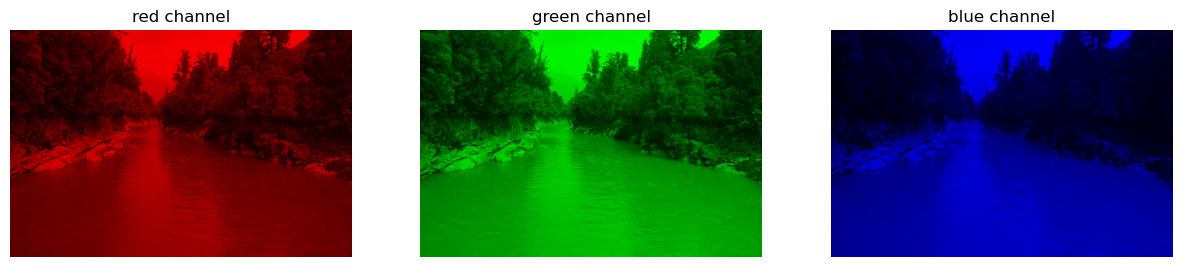

In [5]:
# plot the color channels of the RGB image
u2.plot_image_channels_rgb(image_path)

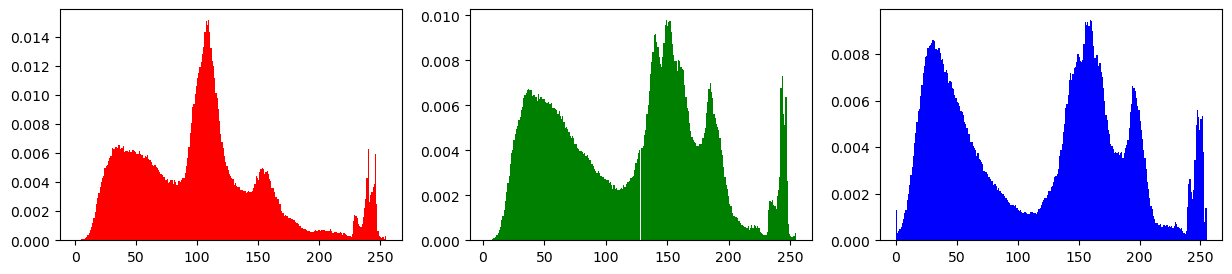

In [6]:
# plot the histograms for each color channel
u2.plot_color_histograms(image_path)

<div class="alert alert-warning">
    <b>Exercise 2.3. [5 Points]</b>
    <ul>
        <li>Try to find good <b>color threshold</b> values to segment the image so the river is separated from the background.</li>
        <li>Note: The result does not need to be precise.</li>
    </ul>
</div>

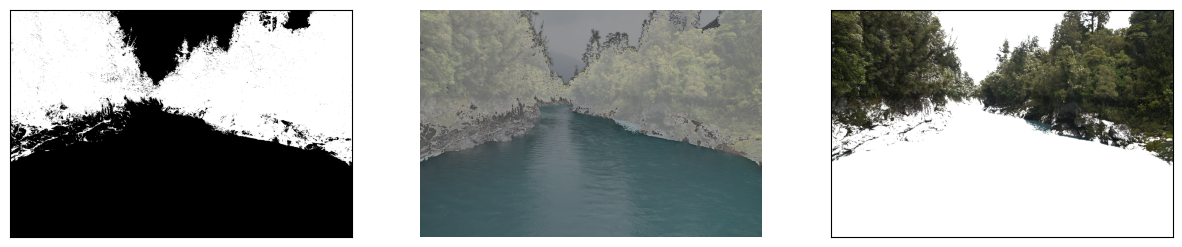

In [7]:
# segment the image to separate the river from the background
u2.segment_image(image_path, lower_threshold_r=8, upper_threshold_b=92)

<h2>Exercise 3</h2>

With the functions from the file `u2_utils.py`, as shown in the lecture notebook, perform the tasks below:

<div class="alert alert-warning">
    <b>Exercise 3.1. [10 Points]</b>
    <ul>
        <li>Generate three sine waves (all of them with a duration of 1.4 second, at a sampling rate of 32000 Hz) with the following frequencies: 293.66 Hz, 349.23 Hz and 440 Hz (in music terms, this is called an D minor chord, here with the notes D3, F3 and A4).</li>
        <li>Then, add them together into a complex sound, plot the wave with <code>u2.plot_wave(...)</code> and generate a player to listen to it.</li>
    </ul>
</div>

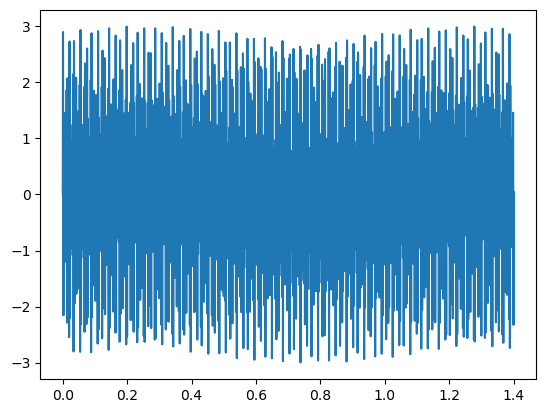

In [8]:
T = 1.4  # length of the sound signal
sampling_rate = 32000 # sampling rate

# generate three waves
sine_wave_1 = u2.generate_wave(293.66, T, sampling_rate)  # this is D3
sine_wave_2 = u2.generate_wave(349.23, T, sampling_rate)  # this is F3
sine_wave_3 = u2.generate_wave(440, T, sampling_rate)  # this is A4

# add the waves thogether
added_sine_waves = sine_wave_1 + sine_wave_2 + sine_wave_3

# plot the wave and create player
u2.plot_wave(added_sine_waves, T, sampling_rate)
ipd.Audio(added_sine_waves, rate=sampling_rate)

<div class="alert alert-warning">
    <b>Exercise 3.2. [5 Points]</b>
    <ul>
        <li>Use the <code>u2.apply_fourier_transform(...)</code> function to apply the discrete Fourier transform (DFT) to this complex sound and plot the output, i.e., decompose the complex sound into the original sine waves. Choose a meaningful maximum frequency when plotting the spectrum.</li>
    </ul>
</div>

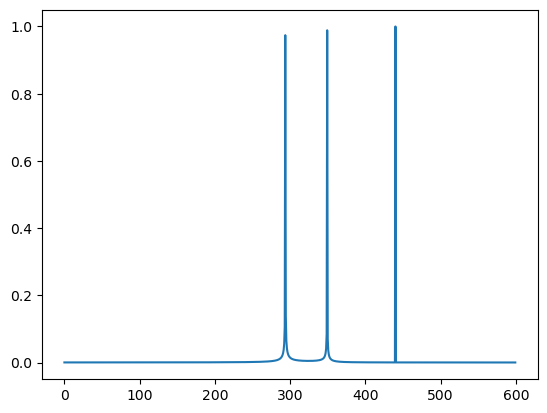

In [49]:
ft_added_points = u2.apply_fourier_transform(added_sine_waves)
u2.plot_spectrum(ft_added_points, sampling_rate, max_freq=600)

<h2>Exercise 4</h2>

By using the functions `u2.read_wav_file(...)` and `u2.apply_fourier_transform(...)` from `u2_utils.py`, perform the task below:

<div class="alert alert-warning">
    <b>Exercise 4.1. [10 Points]</b>
    <ul>
        <li>Read the audio file named <code>audio.wav</code> from the <code>resources</code> folder.</li>
        <li>Apply Fourier analysis and plot the resulting spectrum.</li>
    </ul>
</div>

In [53]:
sound_path = "resources/audio.wav"

T = 20
points_audio, sampling_rate_audio = u2.read_wav_file(sound_path, time=T)
ft_points_audio = u2.apply_fourier_transform(points_audio)

<div class="alert alert-warning">
    <b>Exercise 4.2. [5 Points]</b>
    <ul>
        <li>Identify the frequencies of the three hidden sine waves.</li>
        <li>Hint: Adapt <code>max_freq</code> from the <code>u2.plot_spectrum(...)</code> function above.</li>
    </ul>
</div>

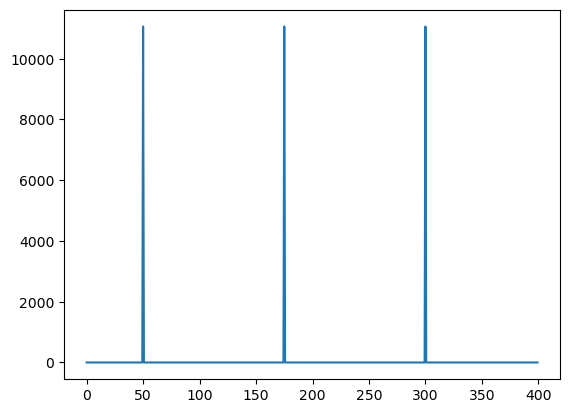

In [54]:
u2.plot_spectrum(ft_points_audio, sampling_rate_audio, max_freq=400)

Hidden Sine wave frequencies: 50Hz, 175Hz, 300Hz

<h2>Exercise 5</h2>

Again following the main lecture notebook, perform the tasks below:

<div class="alert alert-warning">
    <b>Exercise 5.1. [5 Points]</b>
    <ul>
        <li>Download the word embedding model and load it by using the <code>spacy</code> library.</li>
    </ul>
</div>

In [94]:
# download embedding 
!python -m spacy download en_core_web_md

                                              0.0/42.8 MB ? eta -:--:--
                                             0.0/42.8 MB 640.0 kB/s eta 0:01:07
                                             0.0/42.8 MB 487.6 kB/s eta 0:01:28
                                              0.2/42.8 MB 1.8 MB/s eta 0:00:25
                                              0.7/42.8 MB 4.7 MB/s eta 0:00:09
     -                                        1.5/42.8 MB 7.5 MB/s eta 0:00:06
     --                                       2.2/42.8 MB 8.8 MB/s eta 0:00:05
     --                                       2.2/42.8 MB 8.8 MB/s eta 0:00:05
     --                                       3.1/42.8 MB 9.0 MB/s eta 0:00:05
     ---                                      4.1/42.8 MB 10.6 MB/s eta 0:00:04
     ----                                     4.7/42.8 MB 10.7 MB/s eta 0:00:04
     -----                                    5.4/42.8 MB 11.0 MB/s eta 0:00:04
     -----                                    5.9/42.8

In [13]:
# load dataset containing the embeddings
word_embedding_english = spacy.load('en_core_web_md')

<div class="alert alert-warning">
    <b>Exercise 5.2. [10 Points]</b>
    <ul>
        <li>Evaluate which two words have a higher similarity: "study" and "exam" or "party" and "exam".</li>
        <li>Then, print out the result.</li>
        <li>Hint: You could use an if-else statement to make the comparison (feel free to investigate this option on the Internet). Otherwise, simply evaluate both similarities manually and print the higher one.</li>
    </ul>
</div>

In [14]:
study = word_embedding_english('study')
exam = word_embedding_english('exam')
party = word_embedding_english('party')

In [17]:
# similarity of study and exam
study.similarity(exam)

0.44302586626026697

In [18]:
# similarity of party and exam
party.similarity(exam)

0.08334750848509064

"study" and "exam" are more similar than "party" and "exam"

<h2>Exercise 6</h2>

With the functions from the file `u2_utils.py`, perform the tasks below:

<div class="alert alert-warning">
    <b>Exercise 6.1. [5 Points]</b>
    <ul>
        <li>Following the example given in the lecture notebook, create a list containing these words: "car", "engine", "diesel", "petrol", "transmission", "gasoline", "restaurant", "waiter", "waitress", "dinner", "lunch", "movie", "film", "cinema", "hardware", "computer", "notebook", "keyboard", "monitor", "screen".</li>
        <li>Hint: A list can be created with <code>my_list = [...]</code>, where <code>...</code> is the content.</li>
    </ul>
</div>

In [19]:
example_words = ['car', 'engine', 'diesel', 'petrol', 'transmission', 'gasoline', 'restaurant', 'waiter', 'waitress', 'dinner', 'lunch', 'movie', 'film', 'cinema', 'hardware', 'computer', 'notebook', 'keyboard', 'monitor', 'screen']

<div class="alert alert-warning">
    <b>Exercise 6.2. [5 Points]</b>
    <ul>
        <li>Get the embeddings of the words with <code>u2.get_word_vectors(...)</code> and display the result data frame.</li>
    </ul>
</div>

In [20]:
# get embedding vectors for list of words
df_embeddings = u2.get_word_vectors(word_embedding_english, example_words)
df_embeddings

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
car,4.585500,2.45560,-8.523300,-6.05950,-0.448790,-2.54090,4.37210,1.48890,4.607500,6.793300,...,-7.04620,-8.339000,0.648060,0.73438,-4.76530,-3.440800,-3.544300,2.77350,1.24640,-0.44430
engine,2.746200,1.36630,0.274930,1.45510,-0.479860,1.54950,1.19480,4.86120,-3.367200,5.193600,...,1.06680,2.288900,-3.826900,1.78090,-0.70397,-0.370060,1.043600,-0.31719,-1.34000,-0.53651
diesel,-2.233300,2.74340,-0.048071,-0.21960,-1.658900,-0.51077,2.92180,0.11666,-0.631480,3.375200,...,0.36098,0.352140,0.019807,-1.10880,-1.24990,0.034684,-0.018366,0.88082,-1.32050,-1.65730
petrol,-1.632500,2.89860,0.233510,0.66380,-0.415350,-2.27380,0.33252,-0.27927,0.187370,2.266400,...,-1.63310,-1.277300,1.354200,-0.85586,-2.45590,1.628900,-0.707700,-0.21798,-1.22590,0.33197
transmission,-0.210690,1.06440,-1.316900,1.78460,4.467700,1.34640,0.24079,4.15590,-2.871600,-0.369020,...,1.59930,2.879200,-0.821200,-1.50630,1.64480,0.578700,1.746300,-3.60310,0.60647,1.42470
gasoline,-1.923600,1.85450,-1.714000,1.19470,0.413660,-0.83264,0.84860,0.13810,0.138520,0.041883,...,-2.19120,-1.825000,1.310900,-1.38160,-4.51510,-0.978710,2.157100,0.61622,-1.30330,-1.94910
restaurant,0.846360,-1.12490,-2.341500,-0.12289,3.011800,-1.99780,0.35718,1.99070,-0.491760,4.166300,...,0.10264,-1.550100,2.393100,-0.64088,-1.25590,-1.734700,-2.051400,1.33630,-1.39480,1.81250
waiter,0.744520,0.30464,0.936000,1.14660,-1.549300,-1.84740,-1.58230,-0.92187,-0.963640,3.402800,...,0.65354,-1.435100,2.970500,-3.20180,-0.40725,-2.046900,-0.612210,3.11790,-2.14190,1.70810
waitress,1.669500,-0.29016,-0.807090,0.15619,-1.023800,-2.34660,-1.48650,-1.53870,-0.875940,4.730800,...,1.41650,-0.011615,2.269400,-2.14920,-1.56730,-1.923600,-0.563750,1.36920,-1.37540,2.52600
dinner,-0.594400,-1.90600,-4.776300,-0.76610,0.872880,-1.58380,0.52829,-0.30689,-0.792780,4.184500,...,0.34735,-1.571200,0.899890,-1.42670,-3.97390,-1.250800,-0.339950,3.23700,-1.74510,1.05230


<div class="alert alert-warning">
    <b>Exercise 6.3. [7 Points]</b>
    <ul>
        <li>Apply the PCA down-projection method, i.e., the function <code>u2.apply_pca(...)</code>.</li>
        <li>Then, plot it in a 2D representation by using the function <code>u2.plot_word_embeddings_2d(...)</code>.</li>
        <li>Does the visualization reveal anything interesting?</li>
    </ul>
</div>

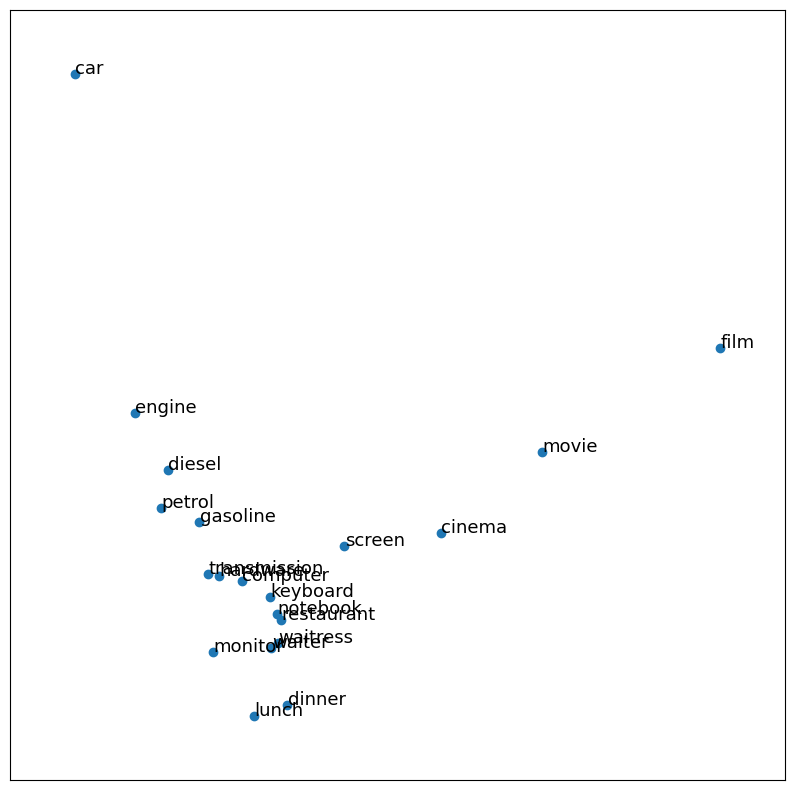

In [21]:
embeddings_pca_2d = u2.apply_pca(n_components=2, data=df_embeddings)
u2.plot_word_embeddings_2d(embeddings_pca_2d)

The visualization does not reveal anything interesting, there seems to be some sort of clustering, but it is not obvious what it is.

<div class="alert alert-warning">
    <b>Exercise 6.4. [7 Points]</b>
    <ul>
        <li>Down-project the 300-dimensional representation of each word to 2 dimensions by applying the t-SNE method, i.e., the function <code>u2.apply_tsne(...)</code>.</li>
        <li>Then, plot it in a 2D representation by using the function <code>u2.plot_word_embeddings_2d(...)</code>.</li>
        <li>Look for a fitting <code>perplexity</code> value in order to group the words into meaningful clusters.</li>
        <li>Note: Setting the seed for the random number generator <code>np.random.seed(seed=...)</code> is not necessary but useful if you want to ensure reproducible results.</li>
    </ul>
</div>

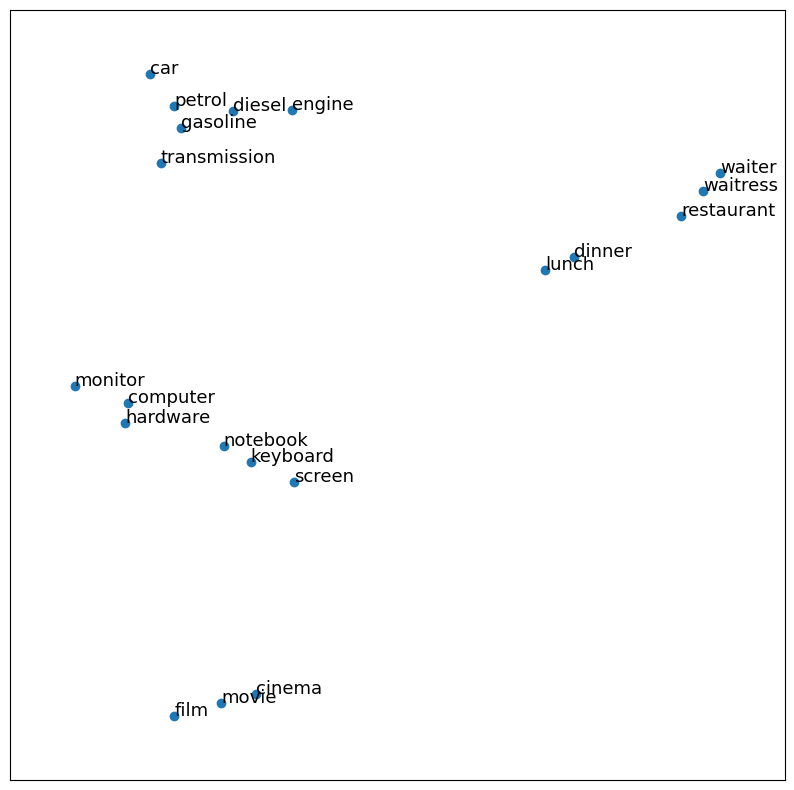

In [22]:
np.random.seed(seed=22)

embeddings_pca_2d = u2.apply_tsne(n_components=2, data=df_embeddings, perplexity=2)
u2.plot_word_embeddings_2d(embeddings_pca_2d)

<div class="alert alert-warning">
    <b>Exercise 6.5. [5 Points]</b>
    <ul>
        <li>Given the two visualizations (PCA and t-SNE), how many (main) clusters are there?</li>
        <li>Note: Due to version differences, it might be that not both visualizations actually show clusters, which is fine. In this case, focus on the one that does show some clusters.</li>
    </ul>
</div>

In t-SNE there are 3 clusters vehicle-related, food-related and cinema-related.